# Recognizing Handwritten Digits with scikit-learn


          The primary aim of this project involves predicting a numeric value, and then reading and interpreting an image that uses a handwritten font.

          Recognizing handwritten text is a problem that traces back to the first automatic machines that needed to recognize individual characters in handwritten documents. Think about, for example, the ZIP codes on letters at the post office and the automation needed to recognize these five digits. Perfect recognition of these codes is necessary to sort mail automatically and efficiently. Included among the other applications that may come to mind is OCR (Optical Character Recognition) software.

          OCR software must read handwritten text, or pages of printed books, for general electronic documents in which each character is well defined. But the problem of handwriting recognition goes farther back in time, more precisely to the early 20th Century (the 1920s), when Emanuel Goldberg (1881–1970) began his studies regarding this issue and suggested that a statistical approach would be an optimal choice.

           To address this issue in Python, the scikit-learn library provides a good example to better understand this technique, the issues involved, and the possibility of making predictions.

## Import Dataset :
- The scikit-learn library has a package of datasets. These datasets are useful for getting a handle on a machine-learning algorithm or library feature.


### Load Dataset :
- Import datasets module from sklearn library and load the digits dataset using the load_digits() function.

In [1]:
from sklearn import datasets
digits = datasets.load_digits()

### Full description of the dataset i.e DESCR :
- After loading the dataset, we can read the information about the dataset by calling the DESCR attribute.


- The textual description of the dataset, the authors who contributed to its creation, and the references will appear as shown in the output.


In [2]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

Each dataset in the scikit-learn library has a field containing all the information.

## Targets :
- The numerical values represented by images, i.e., the targets, are contained in the digit.targets array.

In [3]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

### Shape of the dataset :
- Dimensions of the dataset can be obtained using data.shape() function.

In [4]:
digits.data.shape

(1797, 64)

The output shows that the dataset has 1797 images of 8x8 size.

### Images of the handwritten digits are stored in the form of array :

- The images of the handwritten digits are contained in a digits.images array. Each element of this array is an image that is represented by an 8x8 matrix of numerical values that correspond to a grayscale from white, with a value of 0, to black, with the value 15


- The images of the handwritten digits are contained in a digits.images array asshown in the following array

In [5]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

### Visualizing an array (Obtaining Gray Scale Image)
we can visually check the contents of this result using the matplotlib library.
- Import pyplot module which is under matplotlib as plt.


- The imshow() function is used to display data as an image; i.e. on a 2D regular raster.


- cmap = gray_r displays a grayscale image.


- interpolation= ‘nearest’ displays an image without trying to interpolate between pixels if the display resolution is not the same as the image resolution.


- The title() function is used to display the title on the graph.

Text(0.5, 1.0, 'Visualizing an array')

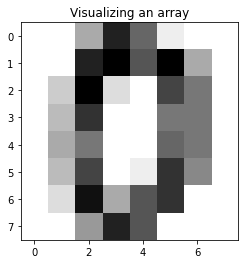

In [6]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[0], cmap=plt.cm.gray_r,interpolation='nearest')
plt.title('Visualizing an array')

- By running the above command, we will obtain the grayscale image as shown in above Digram

## Visualization of the 10 digits :
Using the NumPy and matplotlib libraries, we can display each digit from 0 to 9 which are in the form of an array as images.


- The figure() function in the pyplot module of the matplotlib library is used to create a new figure with a specified size of (15,4).


- subplots_adjust(hspace=0.8) is used to adjust the space between the rows of the subplots.


- Combine two lists using the zip() function for easier handling inside the plotting loop.


- enumerate() method adds a counter to an iterable and returns it. The returned object is a enumerate object.


- subplot() function is used to add a subplot to a current figure at the specified grid position.

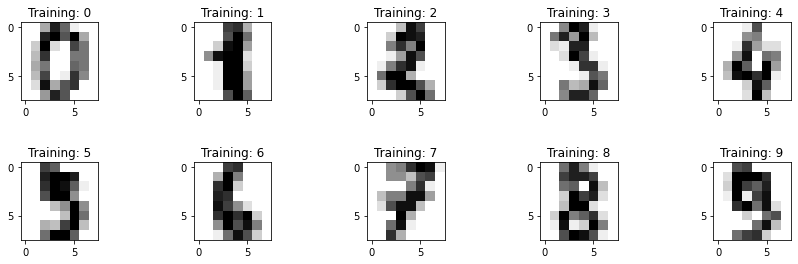

In [7]:
import numpy as np
plt.figure(figsize=(15,4))
plt.subplots_adjust(hspace=0.8)
images_and_labels = list(zip(digits.images, digits.target))

for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label, fontsize = 12)

By running the above command, we will obtain the 10 digits of grayscale image as shown in above Digram

## Flatten the input images :
The inputs are 8x8 grayscale images. we can produce a flat array of 64-pixel values so that each pixel corresponds to a column for the classifier.


- len() function gives the number of images in the dataset.


- reshape() function returns an array containing the same data with a new shape.

In [8]:
n = len(digits.images)
print(n)
data = digits.images.reshape((n, -1))

1797


The above code is reported that the dataset is a training set consisting of 1,797 images. we can determine if that is true.

In [9]:
digits.target.size

1797

### Support Vector Classifier :
- An estimator that is useful in this case is sklearn.svm.SVC, which uses the technique of Support Vector Classification (SVC).


- “Support Vector Machine” (SVM) is a supervised machine learning algorithm that is mostly used in classification problems.


- Import the SVM module of the scikit-learn library and create an estimator of SVC type and then choose an initial setting, assigning the values C and gamma generic values.

In [10]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
svc = svm.SVC(gamma=0.001, C=100.)

## Split the Dataset :
- once we define a predictive model, we must instruct it with a training and test set. The training set is a set of data in which you already know the belonging class and the test set is a secondary data set that is used to test a machine learning program after it has been trained on initial training.


- Import train_test_split() function which is used for splitting data arrays into two subsets i.e., into train and test sets.


### case 1: Here we have split the data by assigning 0.01 as test size.

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data,digits.target, test_size=0.01, random_state=0)

### Training and Prediction :

we can train the svc estimator that we defined earlier using the fit() function.

In [12]:
svc.fit(x_train, y_train)

SVC(C=100.0, gamma=0.001)

## Test the model :

- we can test our estimator by making it interpret the digits of the test set using predict() function.

In [13]:
y_pred = svc.predict(x_test)
y_pred

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0])

We obtain the results in the form of an array.

###  Test samples and their predicted digit values :

Visualize the test images

- We can plot the images of the predicted digits from the array using the following code.


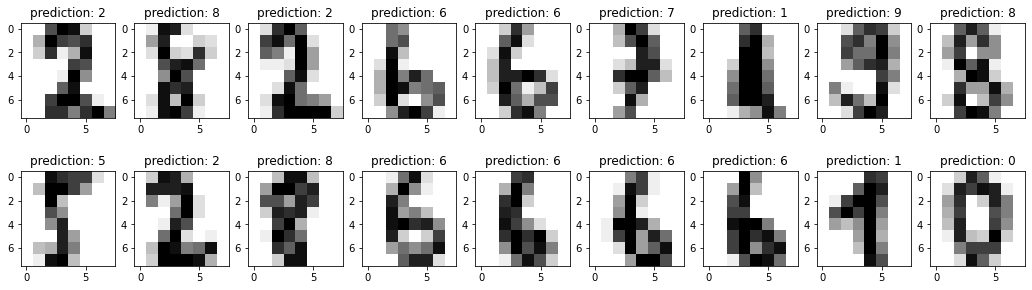

In [14]:
images_and_predictions = list(zip(x_test,y_pred))

plt.figure(figsize=(18,5))
for index, (image, prediction) in enumerate(images_and_predictions[:19]):
    plt.subplot(2, 9, index + 1)
    image = image.reshape(8, 8)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('prediction: %i' % prediction)
    
# save the figure
plt.savefig('plot3.png', dpi=300,bbox_inches='tight')

It is able to recognize the handwritten digits and interprete all the digits of the validation set correctly.

## Accuracy of the model :
- The accuracy score of the model can be obtained using the score() function.

In [15]:
score = svc.score(x_test, y_test)
print('Accuracy Score: {0}'.format(score))

Accuracy Score: 1.0


###  Case 2 :Creating a Confusion Matrix and Classification Report for SVM

- A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known.


- A Classification report is used to measure the quality of predictions from a classification algorithm.


- The following code will display the confusion matrix and classification report using the confusion_matrix() and classification_report() functions.

Classification report for SVM classifier:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         1

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



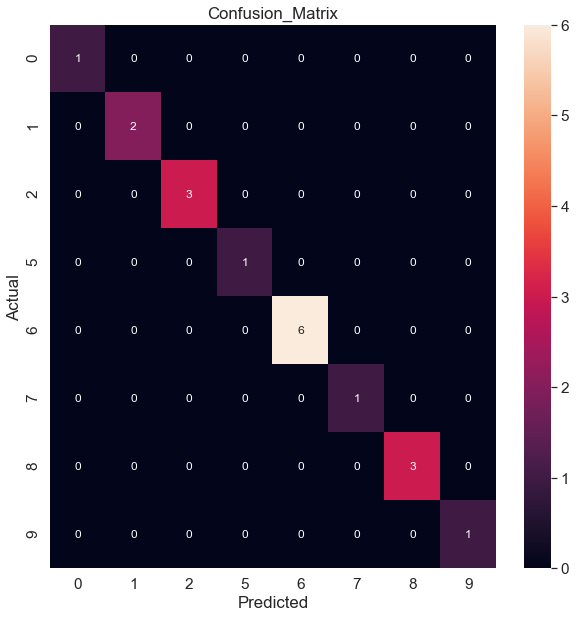

In [16]:
#For Confusion Matrix
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn

data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

plt.figure(figsize = (10, 10))
sn.set(font_scale=1.4) #for lable size
plt.title('Confusion_Matrix')
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}) # Font size

#For Classification Report


from sklearn.metrics import classification_report
cr=classification_report(y_test, y_pred)
print("Classification report for SVM classifier:\n\n",cr)

## Conclusion:-
                        Given the large number of elements contained in the Digits dataset, we will certainly obtain a very effective model, i.e., one that’s capable of recognizing with good certainty.
                   
                   After performing the data analysis on the dataset with three different test cases, we can conclude that the given hypothesis is true i.e.,This dataset predicts the digit accurately 95% of the times